In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
DATASETS = ['mnist', 'wine_quality']
DATASET_STRS = ['MNIST', 'Wine Quality']
dataset_to_str = dict(zip(DATASETS, DATASET_STRS))

# METHOD = 'GMM'
# metric = 'aic'

METHOD = 'KMeans'
metric = 'inertia'

metric_str = metric.replace('_', ' ').title()
metric_str = metric_str.replace('Aic', 'AIC')
metric_str = metric_str.replace('Bic', 'BIC')

dfs = {}
for dataset in DATASETS:
    df = pd.read_csv(f'results/{dataset}/{METHOD}_metrics.csv')
    df.sort_values(by='num_components', inplace=True)
    dfs[dataset] = df

In [3]:
COLORS = {dataset: color for dataset, color in zip(DATASETS, ['blue', 'red'])}

wine_quality
mnist


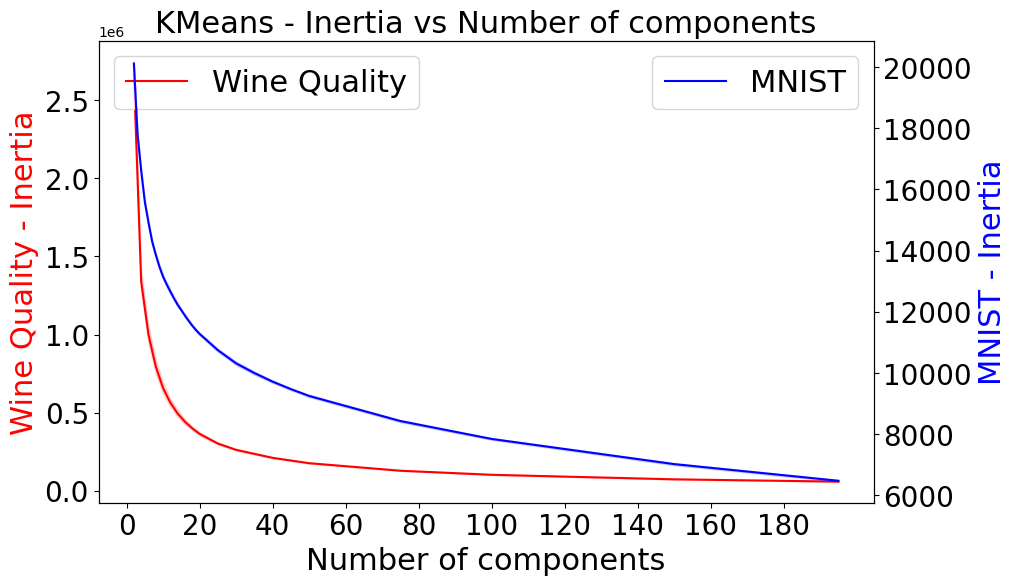

In [25]:
import os
fontsize = 22
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
ax2 = ax1.twinx()
plt.yticks(fontsize=fontsize-2)

for (dataset, df), ax in zip(reversed(dfs.items()), [ax1, ax2]):
    print(dataset)
    X = np.array(df['num_components'])
    y = np.array(df[f'{metric}_mean'])
    error = np.array(df[f'{metric}_std'])
    # mask = X < 50
    # X = X[mask]
    # y = y[mask]
    # error = error[mask]

    ax.plot(X, y, label=dataset_to_str[dataset], color=COLORS[dataset])
    ax.fill_between(
        X, 
        y-error, 
        y+error, 
        alpha=0.15,
        color=COLORS[dataset])

ax1.set_xlabel('Number of components', fontsize=fontsize)
ax2.set_ylabel(f"{DATASET_STRS[0]} - {metric_str}", color=COLORS[DATASETS[0]], fontsize=fontsize)
ax1.set_ylabel(f"{DATASET_STRS[1]} - {metric_str}", color=COLORS[DATASETS[1]], fontsize=fontsize)
plt.title(f'{METHOD} - {metric_str} vs Number of components', fontsize=fontsize)
ax1.legend(loc='upper left', fontsize=fontsize)
ax2.legend(loc='upper right', fontsize=fontsize)

num_components = max(df['num_components'])
# plt.xlim(0, num_components)

ax1.set_xticks(range(0, num_components+1, 20))
# plt.ylim(0, 500)

path = f'/Users/sdale/repos/gatech/machine_learning/unsupervised_learning/final_results/step_1/{METHOD.lower()}_{metric.lower()}_all_datasets.png'
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path)